In [1]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')
!cd "/content/drive/My Drive/hack/"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

test_data =pd.read_excel('/content/drive/My Drive/hack/Test_dataset.xlsx','Test_Aug10')
train_data = pd.read_excel('/content/drive/My Drive/hack/Train_dataset.xlsx')
#Stock Index	Index	Industry	VWAP	General Index	NAV	P/E Ratio	Volumes Traded	Inventory Turnover	Covid Impact (Beta)	Tracking Error	Dollar Exchange Rate	Put-Call Ratio	P/B Ratio	Stock Price
traget = 'Stock Price'
colm =['Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio']
y=train_data['Stock Price']
train = train_data[colm]
test = test_data[colm]
test_indx = test_data['Stock Index']
#train = train.drop(train.columns[0],axis=1)
#test_data = test_data.drop(test_data.columns[0],axis=1)

#train.fillna(-999,inplace=True)
#test.fillna(-999,inplace=True)
print(train_data.columns)
print(train.head())
print(test.head())
print(y.head())

# scatter plot of features  vs index /categories(for histograms of categorical data)  
# for categorical data 
cats=['Index', 'Industry']
uncats= ['VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio'] 


y=y.values





Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')
     Index          Industry  ...  Put-Call Ratio  P/B Ratio
0     NYSE       Real Estate  ...            0.61       9.20
1     NYSE  Information Tech  ...             NaN       6.91
2     NYSE  Information Tech  ...             NaN       6.09
3      BSE         Materials  ...            1.11       5.60
4  S&P 500       Real Estate  ...            1.07       9.46

[5 rows x 13 columns]
     Index          Industry  ...  Put-Call Ratio  P/B Ratio
0      NSE         Materials  ...            0.80       4.66
1      JSE            Energy  ...            0.86       6.11
2  S&P 500  Information Tech  ...            0.93       4.99
3      NSE        Healthcare  ...            1.09       1.26
4     NYSE         Mate

In [2]:
!pip install pytorch-tabnet

In [2]:

from pytorch_tabnet.tab_model import TabNetRegressor

import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
np.random.seed(0)


In [3]:

categorical_columns = []
categorical_dims =  {}
for col in cats:
    print(col, train[col].nunique())
    l_enc = LabelEncoder()#for converting string to int encode
    train[col] = train[col].fillna("VV_likely")
    test[col] = test[col].fillna("VV_likely")
    train[col] = l_enc.fit_transform(train[col].values)
    test[col] = l_enc.transform(test[col].values)
    categorical_columns.append(col)
    categorical_dims[col] = len(l_enc.classes_)# finding max number of label
uncat_means={}

from sklearn.preprocessing import StandardScaler
for col in uncats:
    m=train[col].mean()
    print(col,m)
    uncat_means[col]=m
    train[col]=train[col].fillna(m)#, inplace=True)
    test[col]=test[col].fillna(m)#, inplace=True)
#now std scale
sc = StandardScaler()
train[uncats] = sc.fit_transform(train[uncats].values)
test[uncats]  = sc.transform(test[uncats].values)



print(categorical_columns,categorical_dims)


Index 5
Industry 5
VWAP 486.1881674608576
General Index 24218.079195466962
NAV 54.74600382409201
P/E Ratio 105.54362288431929
Volumes Traded 10418269.156851722
Inventory Turnover 5.436839919816729
Covid Impact (Beta) 0.14065363208220494
Tracking Error 0.038496047592997774
Dollar Exchange Rate 33.99110320284626
Put-Call Ratio 0.9447218416004377
P/B Ratio 4.996781734166903
['Index', 'Industry'] {'Index': 5, 'Industry': 5}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [4]:
print(train_data.columns)
print(train.head())
print(test.head())


Index(['Stock Index', 'Index', 'Industry', 'VWAP', 'General Index', 'NAV',
       'P/E Ratio', 'Volumes Traded', 'Inventory Turnover',
       'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate',
       'Put-Call Ratio', 'P/B Ratio', 'Stock Price'],
      dtype='object')
   Index  Industry  ...  Put-Call Ratio  P/B Ratio
0      3         4  ...   -1.660755e+00   1.609129
1      3         2  ...   -3.855935e-15   0.732442
2      3         2  ...   -3.855935e-15   0.418520
3      0         3  ...    8.200436e-01   0.230932
4      4         4  ...    6.215797e-01   1.708666

[5 rows x 13 columns]
   Index  Industry      VWAP  ...  Dollar Exchange Rate  Put-Call Ratio  P/B Ratio
0      2         3 -1.559706  ...              1.208301   -7.180514e-01  -0.128931
1      1         0  0.948142  ...             -0.481180   -4.203556e-01   0.426176
2      4         2  0.293869  ...             -0.974438   -7.304384e-02  -0.002596
3      2         1  0.578616  ...              1.208301 

In [6]:
features = [ col for col in train.columns] 

cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]

cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]

# define your embedding sizes : here just a random choice
cat_emb_dim = [5,5]
print(features)
print(cat_idxs)
print(cat_dims)
print(cat_emb_dim)

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(train, y, train_size=0.6, random_state=1234)

categorical_features_indices = np.where(train.dtypes != np.float)[0]
print(categorical_features_indices)


print(X_train.head())
print(X_validation.head())

print(test.head())
print(test_indx.head())

['Index', 'Industry', 'VWAP', 'General Index', 'NAV', 'P/E Ratio', 'Volumes Traded', 'Inventory Turnover', 'Covid Impact (Beta)', 'Tracking Error', 'Dollar Exchange Rate', 'Put-Call Ratio', 'P/B Ratio']
[0, 1]
[5, 5]
[5, 5]
[0 1]
      Index  Industry  ...  Put-Call Ratio  P/B Ratio
4857      2         0  ...       -0.073044  -0.473480
4849      2         3  ...        0.770428   0.093112
5548      0         2  ...        0.571964   1.241610
3347      2         4  ...        0.026188   0.858777
4372      4         3  ...        0.026188   1.505764

[5 rows x 13 columns]
      Index  Industry  ...  Put-Call Ratio  P/B Ratio
2783      1         4  ...       -0.718051  -0.530905
942       1         3  ...        1.713131   1.050193
1325      3         3  ...       -0.817283   0.464460
3675      2         2  ...        0.869660   1.609129
2938      2         0  ...        0.323884  -0.270579

[5 rows x 13 columns]
   Index  Industry      VWAP  ...  Dollar Exchange Rate  Put-Call Ratio  P/B

In [7]:
clf = TabNetRegressor(cat_dims=cat_dims, cat_emb_dim=cat_emb_dim, cat_idxs=cat_idxs)
max_epochs = 1000
clf.fit(
    X_train=X_train.values, y_train=y_train.reshape(-1, 1),
    X_valid=X_validation.values, y_valid=y_validation.reshape(-1, 1),
    max_epochs=max_epochs,
    patience=50,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

Device used : cpu
Will train until validation stopping metric hasn't improved in 50 rounds.
---------------------------------------
| EPOCH |  train  |   valid  | total time (s)
| 1     | -506492.62500 |  -493204.81250 |   0.5       
| 2     | -502807.59375 |  -488813.15625 |   1.1       
| 3     | -498379.53125 |  -481712.87500 |   1.6       
| 4     | -492654.96875 |  -473028.12500 |   2.1       
| 5     | -485502.34375 |  -463502.37500 |   2.6       
| 6     | -477259.78125 |  -451833.84375 |   3.1       
| 7     | -467307.62500 |  -440601.43750 |   3.7       
| 8     | -456076.93750 |  -425937.96875 |   4.2       
| 9     | -443000.03125 |  -407101.28125 |   4.7       
| 10    | -427517.65625 |  -387841.65625 |   5.3       
| 11    | -411078.71875 |  -376294.40625 |   5.8       
| 12    | -393740.87500 |  -367577.68750 |   6.4       
| 13    | -375896.21875 |  -355034.68750 |   6.9       
| 14    | -357705.12500 |  -338601.34375 |   7.4       
| 15    | -338969.09375 |  -315611.250

mse score on 40 percent data: 5024.4647365889605
mae score on 40percent data: 24.097769701180678


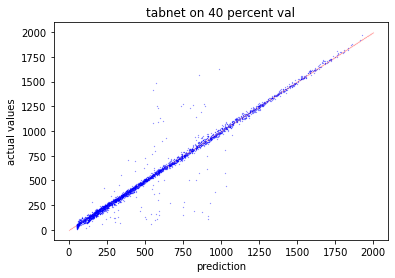

In [8]:
y_scores = clf.predict(X_validation.values)
from sklearn.metrics import roc_auc_score,mean_squared_error,mean_absolute_error

score = mean_squared_error(y_validation, y_scores)
print("mse score on 40 percent data:",score)
score = mean_absolute_error(y_validation, y_scores)
print("mae score on 40percent data:",score)
# to check the fit on 5 percent validation we plot yscores vs yvalidation and see how much it follows y=x line

a=[]
for i in range(0,2000):
  a.append(i)
plt.scatter(np.array(a),np.array(a), s=0.05, c='r', alpha=0.1)
plt.scatter(y_scores,y_validation, s=0.05, c='b', alpha=0.8)
plt.title("tabnet on 40 percent val")
plt.xlabel('prediction')
plt.ylabel('actual values')
#plt.savefig('/content/drive/My Drive/hack/data analysis/'+"catboost_regression_test_final"+'.jpg',)
plt.show()


Now to train it on 95 percent data

[0 1]
      Index  Industry  ...  Put-Call Ratio  P/B Ratio
7122      4         4  ...        1.068123   0.778382
882       2         1  ...        0.224652   0.736271
4611      2         0  ...       -1.462291  -1.331026
2065      3         2  ...       -0.271508  -1.656433
1214      2         3  ...        0.423116   0.759241

[5 rows x 13 columns]
      Index  Industry  ...  Put-Call Ratio  P/B Ratio
3405      4         2  ...        0.472732  -0.764433
2483      0         4  ...       -0.469972   0.487430
4314      4         4  ...       -0.271508  -0.641927
6793      4         3  ...        1.117739  -1.373137
3719      0         1  ...        0.224652   1.555533

[5 rows x 13 columns]
   Index  Industry      VWAP  ...  Dollar Exchange Rate  Put-Call Ratio  P/B Ratio
0      2         3 -1.559706  ...              1.208301   -7.180514e-01  -0.128931
1      1         0  0.948142  ...             -0.481180   -4.203556e-01   0.426176
2      4         2  0.293869  ...             -0.97

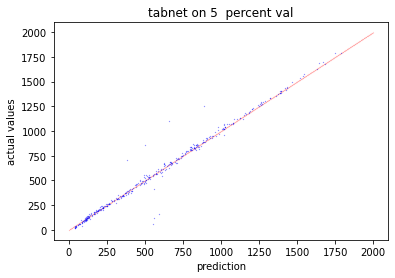

In [10]:
X_train, X_validation, y_train, y_validation = train_test_split(train, y, train_size=0.95, random_state=34)

categorical_features_indices = np.where(train.dtypes != np.float)[0]
print(categorical_features_indices)


print(X_train.head())
print(X_validation.head())

print(test.head())
print(test_indx.head())
clf = TabNetRegressor(cat_dims=cat_dims, cat_emb_dim=cat_emb_dim, cat_idxs=cat_idxs)
max_epochs = 1000
clf.fit(
    X_train=X_train.values, y_train=y_train.reshape(-1, 1),
    X_valid=X_validation.values, y_valid=y_validation.reshape(-1, 1),
    max_epochs=max_epochs,
    patience=50,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    drop_last=False)
y_scores = clf.predict(X_validation.values)
from sklearn.metrics import roc_auc_score,mean_squared_error,mean_absolute_error

score = mean_squared_error(y_validation, y_scores)
print("mse score on 5  percent data:",score)
score = mean_absolute_error(y_validation, y_scores)
print("mae score on 5 percent data:",score)
# to check the fit on 5 percent validation we plot yscores vs yvalidation and see how much it follows y=x line

a=[]
for i in range(0,2000):
  a.append(i)
plt.scatter(np.array(a),np.array(a), s=0.05, c='r', alpha=0.1)
plt.scatter(y_scores,y_validation, s=0.05, c='b', alpha=0.8)
plt.title("tabnet on 5  percent val")
plt.xlabel('prediction')
plt.ylabel('actual values')
plt.savefig('/content/drive/My Drive/hack/data analysis/'+"tabnet_regression_test_final"+'.jpg',)
plt.show()    

In [11]:
# testing data and sumbmition file <create new folder> 
print(test.head())
print(test_indx.head())

   Index  Industry      VWAP  ...  Dollar Exchange Rate  Put-Call Ratio  P/B Ratio
0      2         3 -1.559706  ...              1.208301   -7.180514e-01  -0.128931
1      1         0  0.948142  ...             -0.481180   -4.203556e-01   0.426176
2      4         2  0.293869  ...             -0.974438   -7.304384e-02  -0.002596
3      2         1  0.578616  ...              1.208301    7.208117e-01  -1.430562
4      3         3 -0.381409  ...             -0.974438   -3.855935e-15   0.452975

[5 rows x 13 columns]
0    AC3235
1    AC3236
2    AC3237
3    AC3238
4    AC3239
Name: Stock Index, dtype: object


In [12]:

y_scores = clf.predict(test.values)

In [13]:
sub = pd.DataFrame()
sub['Stock Index']=test_indx
sub['Stock Price'] = y_scores

In [14]:
print(sub.head())
sub.to_csv('/content/drive/My Drive/hack/task1_outputs/tabnet.csv',index=False)

  Stock Index  Stock Price
0      AC3235   778.203125
1      AC3236   252.185516
2      AC3237  1536.025513
3      AC3238   820.137085
4      AC3239   263.067993
